<a href="https://colab.research.google.com/github/mosesdiaz/Caso-2---aprendizaje-automatico/blob/main/Caso_2_aprendizaje_automatico.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Caso 2 - aprendizaje automatico
Prueba realizada por Moises Diaz

construir un modelo de aprendizaje automático que permita para nuevas
transacciones identificar si es legítima o fraudulenta.


### Importamos librerias a utilizar

In [2]:
import pandas as pd
from google.colab import files
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve


### 1. Cargamos datos

In [3]:
uploaded = files.upload()


Saving creditcard_sampledata_2.csv to creditcard_sampledata_2.csv


In [4]:
data = pd.read_csv('creditcard_sampledata_2.csv')

In [5]:


# 3. Exploración de datos
print(data.head())
print(data.info())
print(data['Class'].value_counts())  # Balance de clases

   Unnamed: 0        V1        V2        V3        V4        V5        V6  \
0      221547 -1.191668  0.428409  1.640028 -1.848859 -0.870903 -0.204849   
1      184524  1.966614 -0.450087 -1.228586  0.142873 -0.150627 -0.543590   
2       91201  1.528452 -1.296191 -0.890677 -2.504028  0.803202  3.350793   
3       26115 -0.774614  1.100916  0.679080  1.034016  0.168633  0.874582   
4      201292 -1.075860  1.361160  1.496972  2.242604  1.314751  0.272787   

         V7        V8        V9  ...       V21       V22       V23       V24  \
0 -0.385675  0.352793 -1.098301  ...  0.507173  1.292565 -0.467752  1.244887   
1 -0.076217 -0.108390  0.973310  ...  0.124055  0.564916 -0.039331 -0.283904   
2 -1.633016  0.815350 -1.884692  ... -0.412088 -1.017485  0.129566  0.948048   
3  0.209454  0.770550 -0.558106  ...  0.011158  0.146017 -0.130401 -0.848815   
4  1.005246  0.132932 -1.558317  ...  0.254485  0.530692 -0.651119  0.626389   

        V25       V26       V27       V28  Amount  Class

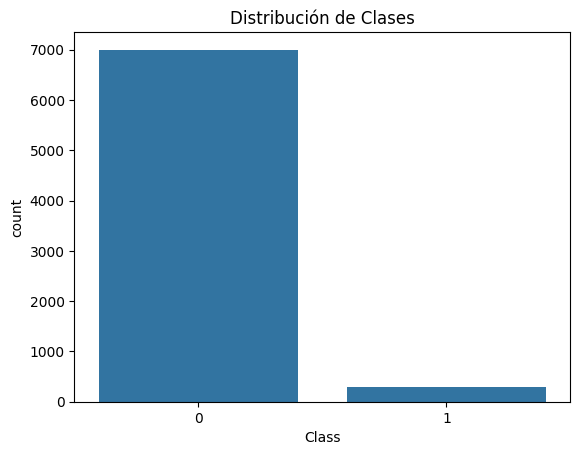

In [6]:
# Graficar la distribución de transacciones legítimas vs fraudulentas
sns.countplot(x='Class', data=data)
plt.title('Distribución de Clases')
plt.show()

In [7]:
# 4. Preprocesamiento
X = data.drop('Class', axis=1)
y = data['Class']

In [8]:
# Normalizar las características
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [9]:
# Dividir en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)


In [10]:
# 5. Entrenar el modelo
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [11]:
# 6. Evaluar el modelo
y_pred = model.predict(X_test)
y_pred_prob = model.predict_proba(X_test)[:, 1]

In [12]:
# Reporte de métricas
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_pred_prob))

Confusion Matrix:
 [[1397    3]
 [  10   50]]

Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00      1400
           1       0.94      0.83      0.88        60

    accuracy                           0.99      1460
   macro avg       0.97      0.92      0.94      1460
weighted avg       0.99      0.99      0.99      1460

ROC AUC Score: 0.982827380952381


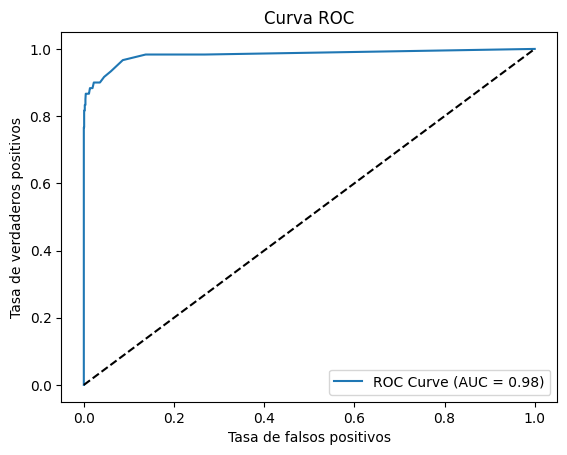

In [13]:
# Curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr, label='ROC Curve (AUC = {:.2f})'.format(roc_auc_score(y_test, y_pred_prob)))
plt.plot([0, 1], [0, 1], 'k--')  # Línea diagonal
plt.xlabel('Tasa de falsos positivos')
plt.ylabel('Tasa de verdaderos positivos')
plt.title('Curva ROC')
plt.legend()
plt.show()

####observamos la data